# Active Subspaces Example Function: Piston Cycle Time

##### Ryan Howard, CO School of Mines, <ryhoward@mines.edu>
##### Paul Constantine, CO School of Mines, <pconstan@mines.edu>

<br>

In this tutorial, we'll be applying active subspaces to the function

$$
C = 2\pi\sqrt{\frac{M}{k+S^2\frac{P_0V_0}{T_0}\frac{T_a}{V^2}}},
$$

where $$
V = \frac{S}{2k}\left(\sqrt{A^2+4k\frac{P_0V_0}{T_0}T_a}-A\right),\\
A=P_0S+19.62M-\frac{kV_0}{S},
$$as seen on [http://www.sfu.ca/~ssurjano/piston.html](http://www.sfu.ca/~ssurjano/piston.html). This function models the cycle time of a piston within a cylinder, and its inputs and their distributions are described in the table below.

Variable|Symbol|Distribution (U(min, max))
:-----|:-----:|:-----
piston Weight|$M$|U(30, 60)
piston Surface Area|$S$|U(.005, .02)
initial Gas Volume|$V_0$|U(.002, .01)
spring Coefficient|$k$|U(1000, 5000)
atmospheric Pressure|$P_0$|U(90000, 110000)
ambient Temperature|$T_a$|U(290, 296)
filling Gas Temperature|$T_0$|U(340, 360)

In [1]:
import active_subspaces as ac
import numpy as np
%matplotlib inline

# The piston_functions.py file contains two functions: the piston function (piston(xx))
# and its gradient (piston_grad(xx)). Each takes an Mx7 matrix (M is the number of data
# points) with rows being normalized inputs; piston returns a column vector of function
# values at each row of the input and piston_grad returns a matrix whose ith row is the
# gradient of piston at the ith row of xx with respect to the normalized inputs
from piston_functions import *

First we draw M samples randomly from the input space.

In [2]:
M = 1000 #This is the number of data points to use

#Sample the input space according to the distributions in the table above
M0 = np.random.uniform(30, 60, (M, 1))
S = np.random.uniform(.005, .02, (M, 1))
V0 = np.random.uniform(.002, .01, (M, 1))
k = np.random.uniform(1000, 5000, (M, 1))
P0 = np.random.uniform(90000, 110000, (M, 1))
Ta = np.random.uniform(290, 296, (M, 1))
T0 = np.random.uniform(340, 360, (M, 1))

#the input matrix
x = np.hstack((M0, S, V0, k, P0, Ta, T0))

Now we normalize the inputs, linearly scaling each to the interval $[-1, 1]$.

In [3]:
#Upper and lower limits for inputs
xl = np.array([30, .005, .002, 1000, 90000, 290, 340])
xu = np.array([60, .02, .01, 5000, 110000, 296, 360])

#XX = normalized input matrix
XX = ac.utils.misc.BoundedNormalizer(xl, xu).normalize(x)

Compute gradients to approximate the matrix on which the active subspace is based.

In [4]:
#output values (f) and gradients (df)
f = piston(XX)
df = piston_grad(XX)

Now we use our data to compute the active subspace.

In [5]:
#Set up our subspace using the gradient samples
ss = ac.subspaces.Subspaces()
ss.compute(df=df, nboot=500)

n should be an integer. Performing conversion.


We use plotting utilities to plot eigenvalues, subspace error, components of the first 2 eigenvectors, and 1D and 2D sufficient summary plots (plots of function values vs. active variable values).

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


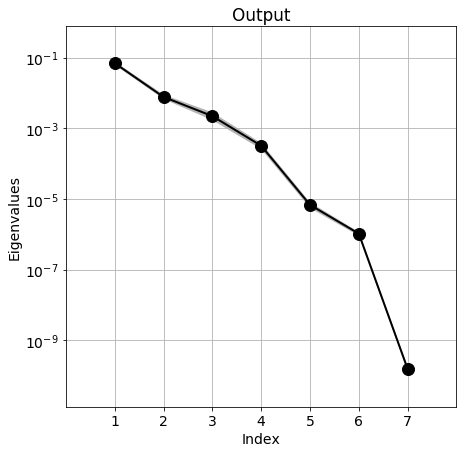

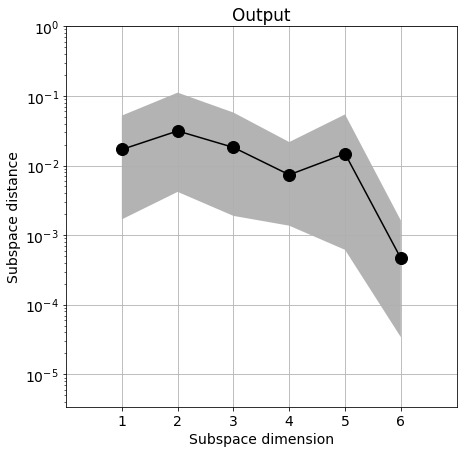

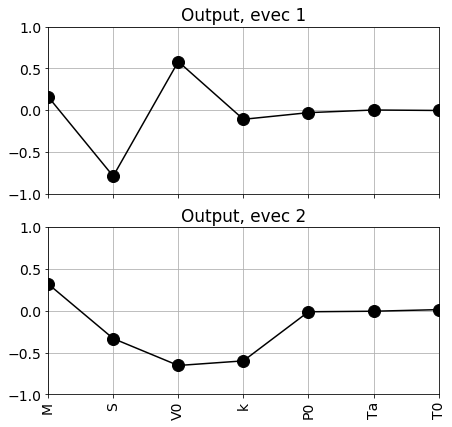

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


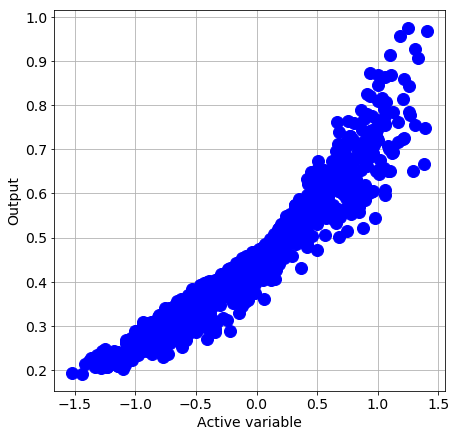

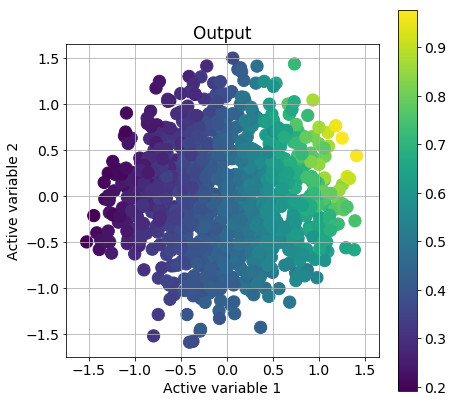

In [6]:
#Component labels
in_labels = ['M', 'S', 'V0', 'k', 'P0', 'Ta', 'T0']

#plot eigenvalues, subspace errors
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)
ac.utils.plotters.subspace_errors(ss.sub_br)

#manually make the subspace 2D for the eigenvector and 2D summary plots
ss.partition(2)
#Compute the active variable values
y = XX.dot(ss.W1)

#Plot eigenvectors, sufficient summaries
ac.utils.plotters.eigenvectors(ss.W1, in_labels=in_labels)
ac.utils.plotters.sufficient_summary(y, f)